I Gusti Ngurah Agung Hari Vijaya Kusuma <br>
Batch 57

Hobi : Push rank

---

# Youtube Views Prediction
- Salah satu implementasi regresi yang dapat dilakukan adalah dengan melakukan prediksi views<br> pada video youtube dengan menggunakan angka statistik atau atribut lain<br> pada videonya.


Data statistik ada pada ﬁle `youtube_statistics.xlsx`


Deﬁnisi masing-masing kolom
- trending_date: tanggal ketika video trending
- title: judul video
- channel_title: nama channel
- category_id: kategori video dalam label encoding
- publish_time: waktu publish video
- tags: tag yang digunakan pada video
- views: jumlah views video
- likes: jumlah likes video
- dislikes: jumlah dislikes video
- comment_count: jumlah komentar pada video
- comments_disabled: apakah status komentar dinonaktifkan pada video
- ratings_disabled: apakah rating dinonaktifkan pada video
- video_error_or_removed: apakah video error atau sudah dihapus saat ini
- description: deskripsi video
- No_tags: jumlah tags yang digunakan
- desc_len: panjang kata deskripsi video
- len_title: panjang kata judul video
- publish_date: tanggal publish vide

**Tugas teman-teman sebagai Data Scientist**
Kerjakan secara berkelompok (team final project)
- Dataset: youtube_statistics.xlsx

- df = pd.read_excel(‘youtube_statistics.xlsx’)

- (1) Lakukan EDA dan preprocessing sederhana (30 point)
Jelaskan Fitur mana yang sebaiknya digunakan dari hasil EDA?

- (2) Lakukan feature engineering (10 point)
Apakah ada feature tambahan lain yang mendukung? Jelaskan mengapa menggunakan feature tersebut.

- (3) Lakukan training model & prediksi views sebagai variabel target (40 point)

Dapat menggunakan model linear regression ataupun algoritma lainnya (30 point)

Lakukan tuning hyperparameter, cari mana model yang paling baik (10 point)

- (4) Evaluasi model dengan metrics RMSE dan R2 (20 point)

Jelaskan & berikan analisis mengapa memilih model tersebut sebagai model akhir
yang digunakan.


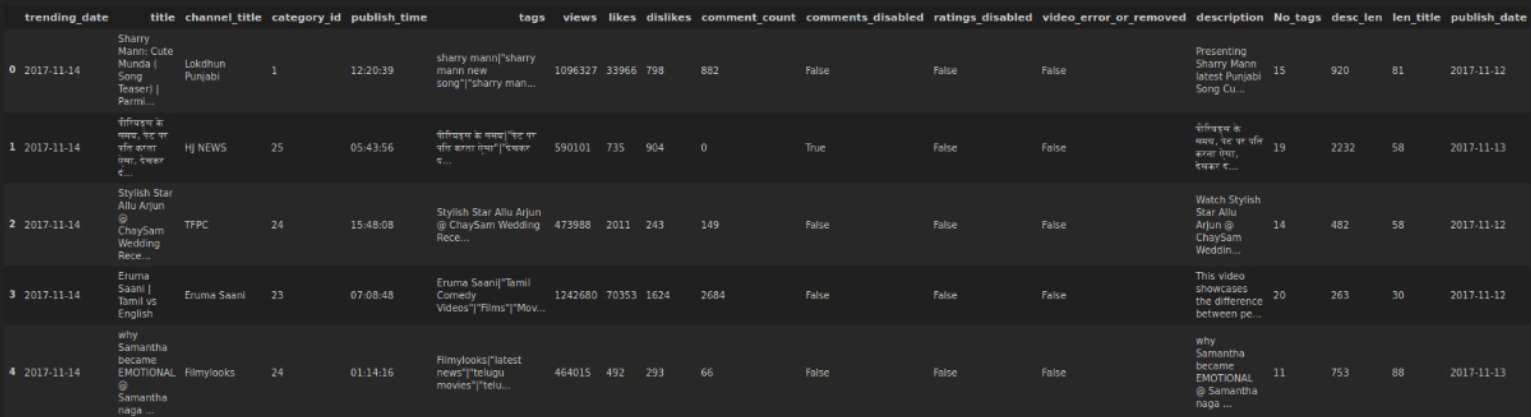


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df = pd.read_excel(r'D:\rakamin_supervisedlearning\Homework\youtube_statistics.xlsx')

### Apakah ada missing value?

In [5]:
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [8]:
df.describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title,publish_date
count,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000,36791
mean,21.552173,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361,2018-02-24 11:20:36.334973440
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000,2017-05-27 00:00:00
25%,23.000000,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000,2017-12-31 00:00:00
50%,24.000000,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000,2018-02-23 00:00:00
75%,24.000000,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000,2018-04-23 00:00:00
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000,2018-06-13 00:00:00
std,6.586716,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174,NaN


In [9]:
#kelompokkan kolom numerik dan kategorikal
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: ['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title']
Categorical columns: ['trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description', 'publish_date']


### Bagaimana Korelasi antar fitur Numerik dengan label target (views)?

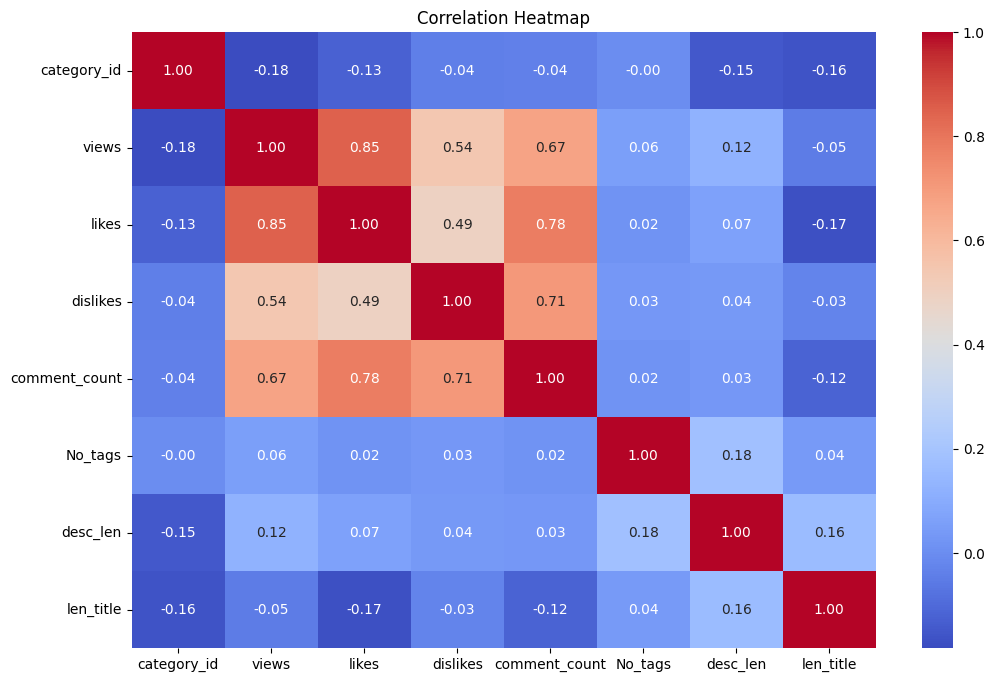

In [10]:
#correlation heatmap untuk fitur numerik
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Bagaimana korelasi antara fitur kategorikal dengan label target (views)?

In [22]:
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


In [16]:
df.groupby('channel_title')['views'].mean().sort_values(ascending=False)

channel_title
YouTube Spotlight              8.226435e+07
TaylorSwiftVEVO                2.864121e+07
Sony Pictures Entertainment    2.271359e+07
FoxStarHindi                   2.251442e+07
Marvel Entertainment           1.969840e+07
                                   ...     
Pakkatv                        1.344300e+04
Reporter Roy                   1.181600e+04
Viral in India                 1.139100e+04
Wide Angle Pictures            1.133700e+04
OneVision Telugu               1.032750e+04
Name: views, Length: 1390, dtype: float64

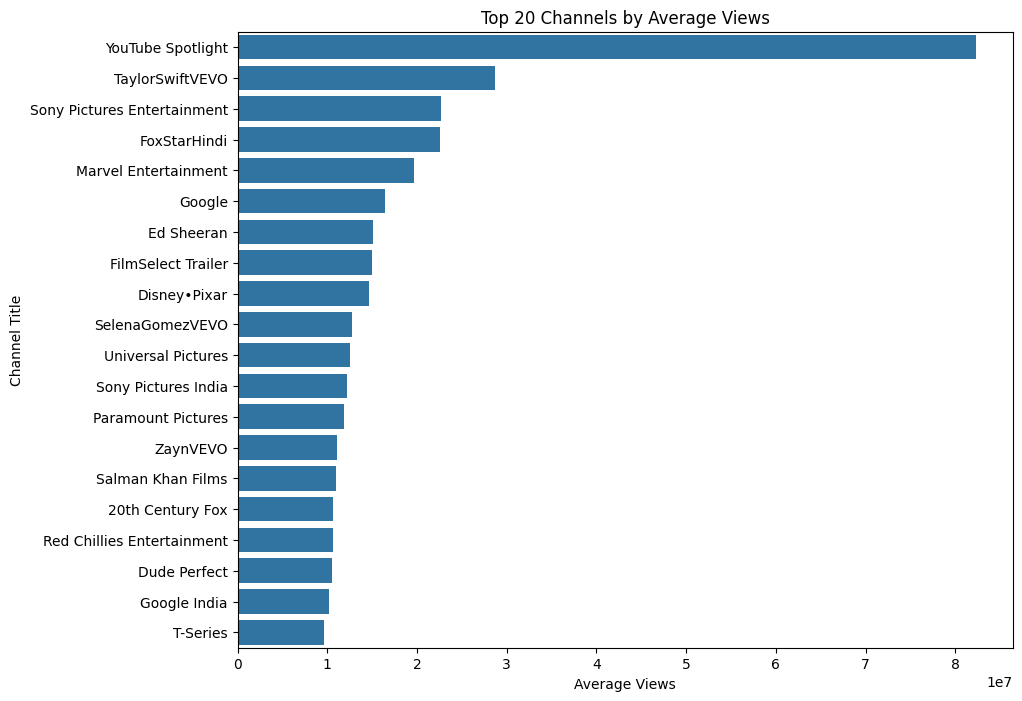

In [31]:
top_channels = (df.groupby('channel_title')['views'].mean().sort_values(ascending=False).head(20).reset_index())

plt.figure(figsize=(10, 8))
sns.barplot(x='views', y='channel_title', data=top_channels)
plt.title('Top 20 Channels by Average Views')
plt.xlabel('Average Views')
plt.ylabel('Channel Title')
plt.show()


### Apakah tipe distribusi dari masing masing kolom?

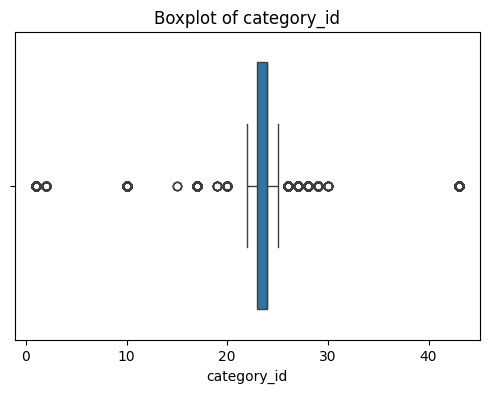

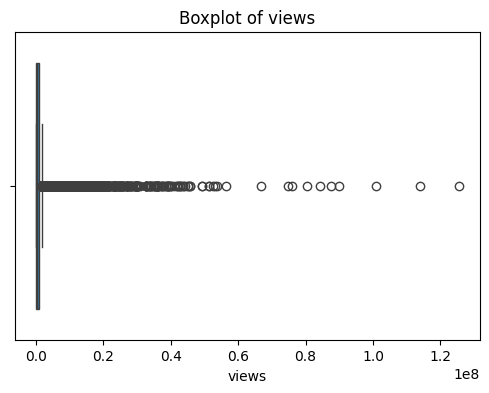

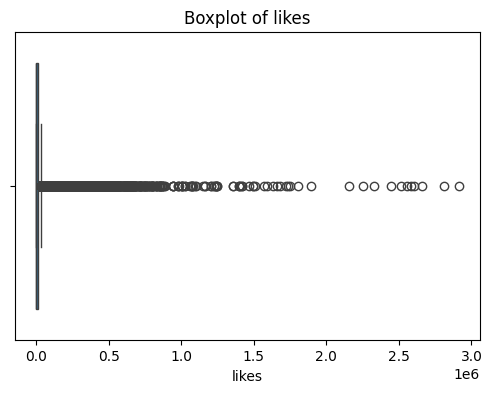

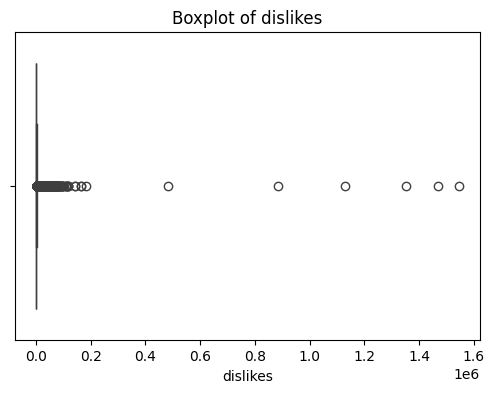

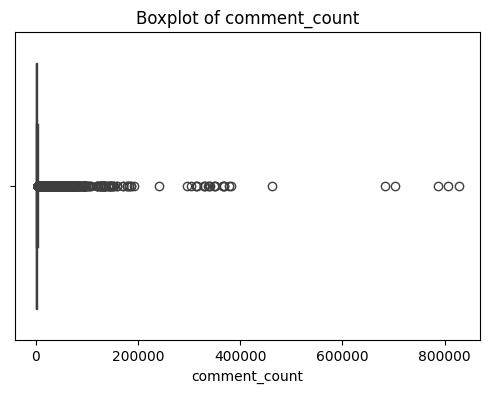

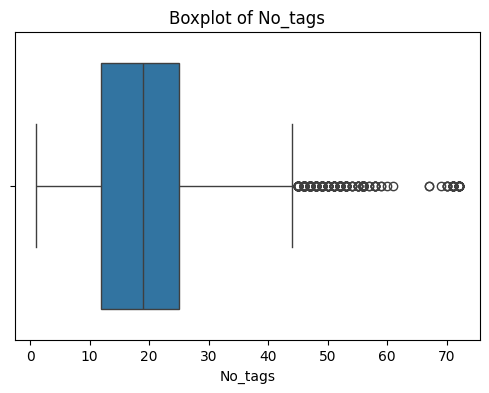

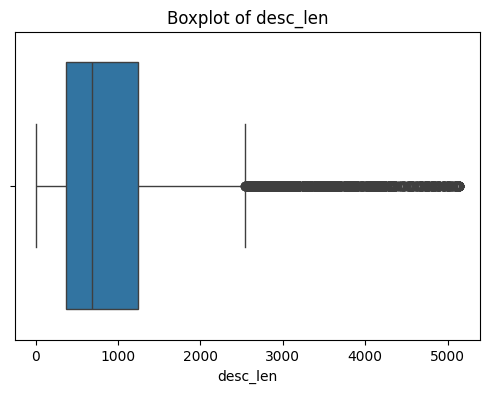

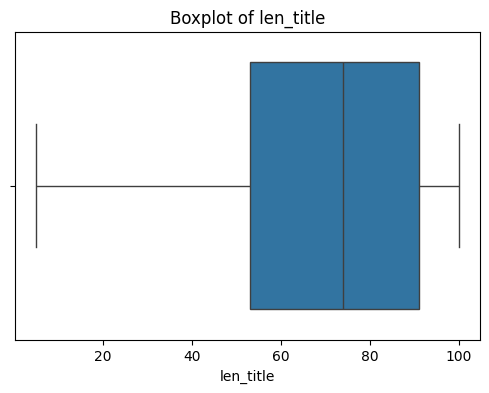

In [34]:
# boxplot untuk kolom numerik
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


## `Interpretasi Awal`

#### `Fitur yang di drop`
Ada beberapa fitur yang harus *dibuang* keputusan ini diambil setelah melakukan analisis menggunakan ilmu peryoutuban, pengukuran statistik, plot, dll. Saya merasa bahwa dengan memasukan like dislikes dan comment_count akan sangat tidak berguna mengingat jika kita ingin memprediksi views apabila kita baru upload video maka like dislike dan comment_count kita pasti 0 dan sangat tidak masuk akal jika kita inputkan nilai 0 tersebut (intinya ga masuk akal), dan untuk trending data juga sama kalau video kita baru upload kan blum trending



- *likes*
- *dislikes*
- *comment_count*
- *trending_date*

Saya juga *membuang* fitur yang secara logika tidak penting dan nilainya hampir uniq semua seperti:

- *title*
- *description*
- *tags*


#### `Fitur yang akan di gunakan`

Adapun fitur fitur yang akan saya gunakan karena menurut saya lumayan relevan dan mantap.

- *category_id*
- *channel_title*
- *publish_time*
- *publish_date*

Fitur yang menurut saya masuk akal juga walaupun saya belum tahu apakah relevan :
- *No_tags*
- *desc_len*
- *len_title*

### `Catatan`
Karena saya akan menggunakan fitur waktu maka saya akan melakukan encoding untuk publish_time dan publish_date, namun sebelum itu saya akan mengubah fitur tersebut menjadi fitur kategorikal dengan logika seperti berikut :

- Pagi: 05:00 – 11:59

- Siang: 12:00 – 17:59

- Malam: 18:00 – 04:59

Dan untuk publish_date saya akan ubah menjadi weekday/weekend saja agar mudah.